In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_pickle("Laptop_preprocessed.pkl")
df.head()

,Company,TypeName,Ram,Weight,Price,IsTouchScreen,IPS,ppi,CpuName,SSD_GB,HDD_GB,Flash_Storage_GB,Hybrid_GB,GpuName,OS_Category
0,Apple,Ultrabook,8,1.37,71378.6832,No,Yes,226.983005,Intel Core i5,128,0,0,0,Intel Iris,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,No,No,127.677940,Intel Core i5,0,0,128,0,Intel HD,Mac
2,HP,Notebook,8,1.86,30636.0000,No,No,141.211998,Intel Core i5,256,0,0,0,Intel HD,Others
3,Apple,Ultrabook,16,1.83,135195.3360,No,Yes,220.534624,Intel Core i7,512,0,0,0,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,No,Yes,226.983005,Intel Core i5,256,0,0,0,Intel Iris,Mac


C:\Users\awan\AppData\Local\Temp\ipykernel_13484\3556049916.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

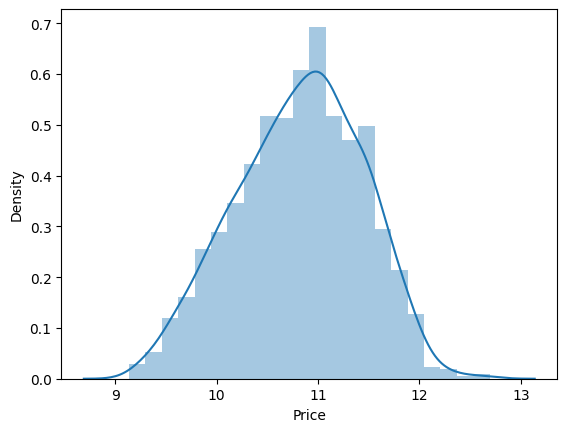

In [3]:
sns.distplot(np.log(df['Price']))

In [4]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

### 🔍 Regression Models Comparison

In this section, we evaluate the performance of various popular regression algorithms on our dataset. Our goal is to identify the best model based on **R² Score** and **Mean Absolute Error (MAE)**.  

We have included the following models in our comparison:

- 📐 **Ridge Regression**
- ✂️ **Lasso Regression**
- 🧠 **Bayesian Ridge**
- 📊 **K-Nearest Neighbors (KNN)**
- 🔍 **Support Vector Regressor (SVR)**
- 🌳 **Decision Tree Regressor**
- 🌲 **Random Forest Regressor**
- 🚀 **AdaBoost Regressor**
- 🌟 **Gradient Boosting Regressor**
- ⚡ **XGBoost Regressor**
- 💡 **LightGBM Regressor**
- 🌲🌲 **Extra Trees Regressor**

Each model is evaluated using a pipeline that includes:

1. 🔄 **One-Hot Encoding** for categorical variables  
2. ✅ Model training and testing on the `X_train` and `X_test` sets  
3. 📈 Performance metrics:  
   - **R² Score** (higher is better)  
   - **MAE (Mean Absolute Error)** (lower is better)  

The results will be printed in **descending order of R² Score**, so the best-performing model appears at the top.


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

# Regression Models
from sklearn.linear_model import Ridge, Lasso, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 1. Categorical Columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# 2. Preprocessing Pipeline
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(sparse_output=False, drop='first'), categorical_cols)
], remainder='passthrough')

# 3. List of Models to Evaluate
models = [
    ('Ridge', Ridge()),
    ('Lasso', Lasso()),
    ('Bayesian Ridge', BayesianRidge()),
    ('KNN', KNeighborsRegressor()),
    ('SVR', SVR()),
    ('Decision Tree', DecisionTreeRegressor(random_state=3)),
    ('Random Forest', RandomForestRegressor(n_estimators=100, random_state=3)),
    ('AdaBoost', AdaBoostRegressor(random_state=3)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=3)),
    ('XGBoost', XGBRegressor(n_estimators=100, random_state=3)),
    ('LightGBM', LGBMRegressor(random_state=3)),
    ('Extra Trees', ExtraTreesRegressor(random_state=3))
]

# 4. Evaluate All Models
results = []

for name, model in models:
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    results.append((name, r2, mae))

# 5. Sort by R² Score Descending
sorted_results = sorted(results, key=lambda x: x[1], reverse=True)

# 6. Print Results
print(f"{'Model':<20} {'R² Score':<10} {'MAE'}")
print('-' * 40)
for name, r2, mae in sorted_results:
    print(f"{name:<20} {r2:<10.4f} {mae:.2f}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000142 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 224
[LightGBM] [Info] Number of data points in the train set: 1107, number of used features: 30
[LightGBM] [Info] Start training from score 10.820609
Model                R² Score   MAE
----------------------------------------
XGBoost              0.9028     0.15
Random Forest        0.8900     0.15
LightGBM             0.8871     0.16
Gradient Boosting    0.8722     0.17
Extra Trees          0.8579     0.16
Ridge                0.8440     0.20
Bayesian Ridge       0.8439     0.20
KNN                  0.8272     0.20
AdaBoost             0.7995     0.22
Decision Tree        0.7849     0.21
SVR                  0.6925     0.28
Lasso                0.5308     0.33


## 📊 Regression Model Performance Summary

Below is a comparison of multiple regression models based on their **R² Score** and **Mean Absolute Error (MAE)**.  
The models are listed in **descending order of R² Score**, so the best-performing model appears at the top. 🚀

| 🔢 Model               | 🧠 R² Score | 📉 MAE |
|------------------------|------------|--------|
| 🥇 **XGBoost**          | **0.9028** | 0.15   |
| 🥈 **Random Forest**    | **0.8900** | 0.15   |
| 🥉 **LightGBM**         | **0.8871** | 0.16   |
| 🌟 Gradient Boosting    | 0.8722     | 0.17   |
| 🌲 Extra Trees          | 0.8579     | 0.16   |
| 📐 Ridge                | 0.8440     | 0.20   |
| 📏 Bayesian Ridge       | 0.8439     | 0.20   |
| 🤝 KNN                  | 0.8272     | 0.20   |
| 🚀 AdaBoost             | 0.7995     | 0.22   |
| 🌳 Decision Tree        | 0.7849     | 0.21   |
| 🔍 SVR                  | 0.6925     | 0.28   |
| ✂️ Lasso                | 0.5308     | 0.33   |

### 📌 Observations:

- ✅ **XGBoost** performed the best with an impressive R² score of **0.9028** and a low MAE of **0.15**.
- 🌲 Ensemble methods like **Random Forest**, **LightGBM**, and **Gradient Boosting** consistently delivered high accuracy.
- ❗ **Lasso Regression** had the lowest R² score, indicating underperformance on this dataset.
- 📉 Lower MAE also confirms better prediction accuracy for the top models.

> 🔧 Tip: Consider using the top 3 models (XGBoost, Random Forest, LightGBM) for deployment or further hyperparameter tuning.


In [26]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBRegressor

# 1. Ensure categorical columns are properly identified
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# 2. Update preprocessor with proper handling
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# 3. Create pipeline with XGBoost
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(
        n_estimators=100,
        random_state=3,
        enable_categorical=False  # Ensure we're not trying to handle categories directly
    ))
])

# 4. Fit the model
model.fit(X_train, y_train)

# 5. Prepare input data (make sure all categorical values match training data)
specs = {
    'Company': 'ASUS',
    'TypeName': 'Notebook',
    'Ram': 8,
    'Weight': 1.4,
    'IsTouchScreen': 0,  # Convert to 0/1 if needed
    'IPS': 1,           # Convert to 0/1 if needed
    'ppi': 157,
    'CpuName': 'Intel Core i7-1165G7',
    'SSD_GB': 512,
    'HDD_GB': 0,
    'Flash_Storage_GB': 0,
    'Hybrid_GB': 0,
    'GpuName': 'Intel Iris Xe Graphics',
    'OS_Category': 'Windows'
}

# 6. Create input DataFrame with same column order as training data
input_df = pd.DataFrame([specs])[X_train.columns]

# 7. Predict
predicted_price = model.predict(input_df)
print(f"Predicted price: ${predicted_price[0]:.2f}")

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''